In [1]:
%matplotlib inline
import powerlaw
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
pl = powerlaw.Power_Law()
pl.alpha = 2.5

In [4]:
data = pl.generate_random(9000)
print data

[ 1.36314862  2.23983855  4.70475338 ... 12.98883076  1.81149088
  1.22730157]


In [5]:
dist_fit = powerlaw.Fit(data)

Calculating best minimal value for power law fit
/usr/lib/python2.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [6]:
ecdf = sm.distributions.ECDF(dist_fit.data_original, side='left')
x = sorted(list(set(dist_fit.data_original)))
y = 1 - ecdf(x)
x_pl = [float(i) for i in x if i >= dist_fit.power_law.xmin]

In [7]:
shift_y = dist_fit.n_tail/len(dist_fit.data_original)

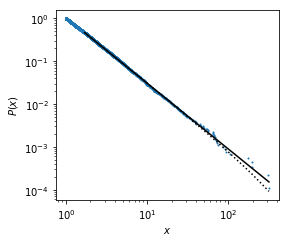

In [8]:
plt.figure(figsize=(4, 3.5))
plt.plot(x, y, marker=".", ls="", ms=2)
plt.plot(x_pl, shift_y*dist_fit.power_law.ccdf(x_pl), color="k")
plt.plot(x_pl, shift_y*dist_fit.truncated_power_law.ccdf(x_pl), color="k", ls=":")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$x$")
plt.ylabel("$P(x)$");